#Importing Neccesary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


#Read Data

In [3]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [5]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
5,Female,20.00,0,0,never,27.32,6.60,85,0
6,Female,44.00,0,0,never,19.31,6.50,200,1
7,Female,79.00,0,0,No Info,23.86,5.70,85,0
8,Male,42.00,0,0,never,33.64,4.80,145,0
9,Female,32.00,0,0,never,27.32,5.00,100,0


#Checking for Null Values

In [6]:
  df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


#Identifying Duplicates

In [7]:
df.duplicated().sum()

3854

In [12]:
df_duplicates=df[df.duplicated()]
df_duplicates

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.00,0,0,No Info,27.32,6.60,159,0
3272,Female,80.00,0,0,No Info,27.32,3.50,80,0
3418,Female,19.00,0,0,No Info,27.32,6.50,100,0
3939,Female,78.00,1,0,former,27.32,3.50,130,0
3960,Male,47.00,0,0,No Info,27.32,6.00,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.00,0,0,never,27.32,6.10,145,0
99985,Male,25.00,0,0,No Info,27.32,5.80,145,0
99989,Female,26.00,0,0,No Info,27.32,5.00,158,0
99990,Male,39.00,0,0,No Info,27.32,6.10,100,0


In [13]:
# Count total duplicates in the 'bmi' column
total_duplicates = df['bmi'].duplicated().sum()
print(f"Total duplicates in 'bmi' column: {total_duplicates}")

# Count total unique values in the 'bmi' column
unique_count = df['bmi'].nunique()
print(f"Total unique values in 'bmi' column: {unique_count}")

# Count overall values in the 'bmi' column
total_values = df['bmi'].size
print(f"Total values in 'bmi' column: {total_values}")

# Optional: Check frequency of each value
value_counts = df['bmi'].value_counts()
print("Value counts (top 10 most common):")
print(value_counts.head(10))  # Display top 10


Total duplicates in 'bmi' column: 95753
Total unique values in 'bmi' column: 4247
Total values in 'bmi' column: 100000
Value counts (top 10 most common):
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
22.40       99
25.00       99
25.60       98
26.70       94
24.50       94
Name: count, dtype: int64


#Dropping Duplicate Values from Each Row



In [14]:
# Drop duplicate rows, keeping only the first occurrence
df = df.drop_duplicates()

# Display the number of rows before and after dropping duplicates
print(f"Original number of rows: {100000}")  # Replace 100000 with df.shape[0] before dropping
print(f"Number of rows after removing duplicates: {df.shape[0]}")

# Optional: Save the cleaned DataFrame
df.to_csv("cleaned_dataset.csv", index=False)  # Save the cleaned dataset to a CSV file


Original number of rows: 100000
Number of rows after removing duplicates: 96146


In [15]:
df_duplicates

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.00,0,0,No Info,27.32,6.60,159,0
3272,Female,80.00,0,0,No Info,27.32,3.50,80,0
3418,Female,19.00,0,0,No Info,27.32,6.50,100,0
3939,Female,78.00,1,0,former,27.32,3.50,130,0
3960,Male,47.00,0,0,No Info,27.32,6.00,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.00,0,0,never,27.32,6.10,145,0
99985,Male,25.00,0,0,No Info,27.32,5.80,145,0
99989,Female,26.00,0,0,No Info,27.32,5.00,158,0
99990,Male,39.00,0,0,No Info,27.32,6.10,100,0


In [43]:
df.duplicated().sum()

0

#Uniqueness

In [19]:
for column in df.columns:
    num_distinct_values = df[column].nunique()
    print(f"{column}: {num_distinct_values} distinct values")


gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


## Remove Unneccessary value [0.00195%]

In [20]:
#  Keep rows with specific categories
df = df[df['gender'].isin(['Male', 'Female'])]

# Explanation:
# 1. `isin(['Male', 'Female'])` keeps only rows with these values in the `gender` column.
# 2. It effectively filters out all other categories.


In [22]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


#Histogram for age

In [25]:
import plotly.express as px

fig = px.histogram(df, x='age', nbins=30, title='Age Distribution')
fig.update_layout(xaxis_title='Age', yaxis_title='Count', bargap=0.1)
fig.show()


#Bar plot for gender

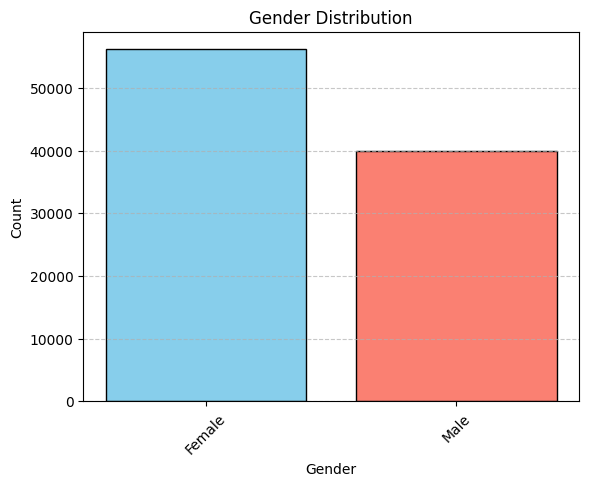

In [27]:
gender_counts = df['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

# Explanation:
# 1. `color` specifies the bar colors. Use a list to assign different colors to bars.
# 2. `edgecolor='black'` adds borders to the bars for better contrast.
# 3. `plt.xticks(rotation=45)` rotates x-axis labels if they overlap.
# 4. `plt.grid()` adds horizontal gridlines to improve readability.


#Distribution plot for BMI

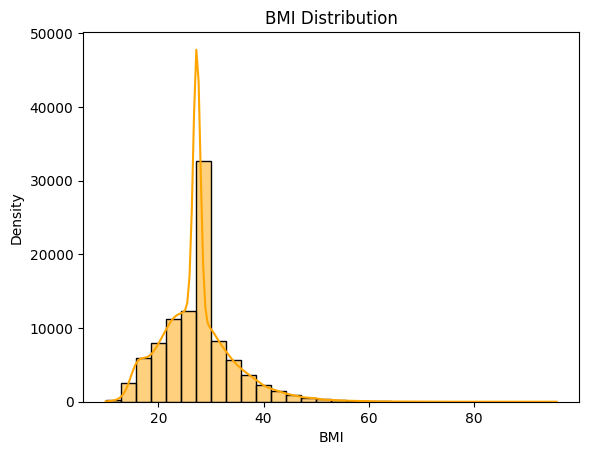

In [29]:
sns.histplot(df['bmi'], bins=30, kde=True, color='orange', line_kws={'color': 'blue'})
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

# Explanation:
# 1. `color='orange'` changes the color of the histogram bars.
# 2. `kde_kws={'color': 'blue'}` changes the color of the KDE line.
# 3. The plot title and axis labels are also added for clarity.


# Count plots for binary variables

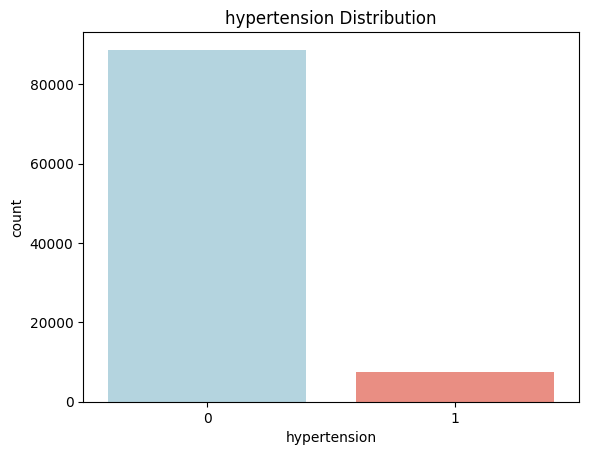

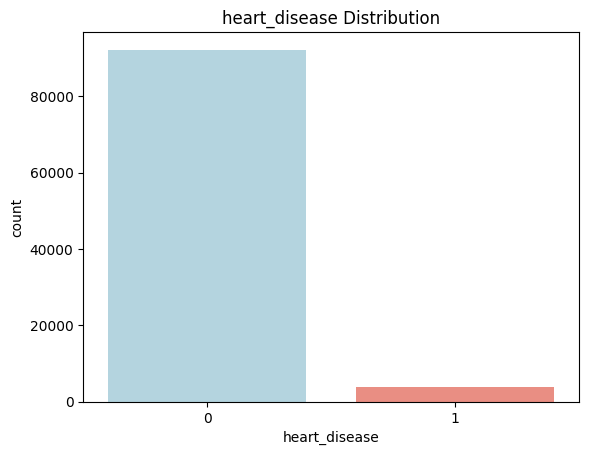

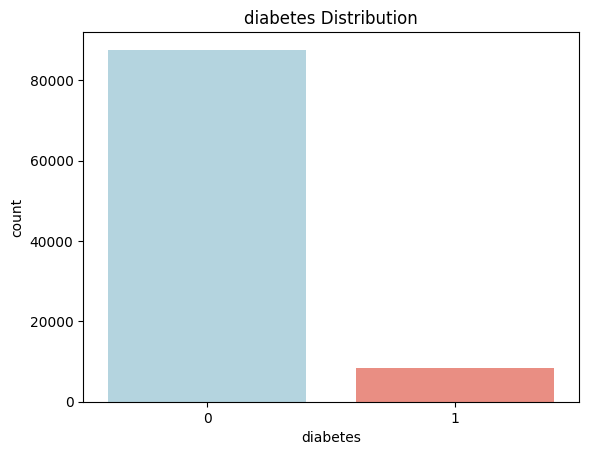

In [32]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df, palette=['lightblue', 'salmon'])
    plt.title(f'{col} Distribution')
    plt.show()

# Explanation:
# 1. `palette=['lightblue', 'salmon']` customizes the colors of the bars.
# 2. You can assign colors manually for each category to make the plot more distinguishable.


#Count plot for Smoking history

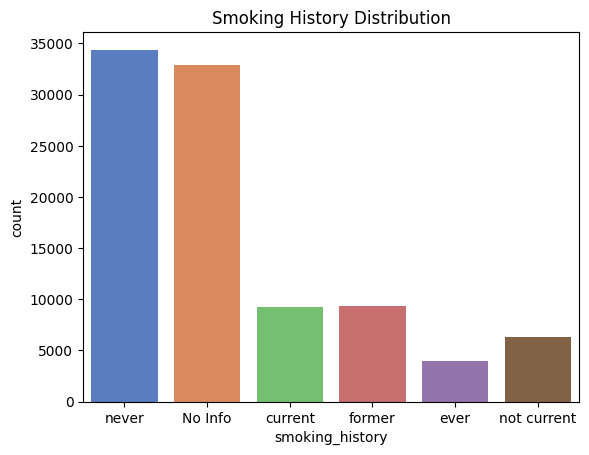

In [33]:
sns.countplot(x='smoking_history', data=df, orient='h', palette='muted')
plt.title('Smoking History Distribution')
plt.show()

# Explanation:
# 1. `orient='h'` changes the orientation to horizontal bars.
# 2. Horizontal bars can improve readability when category labels are long or there are many categories.


#Bivariative Analysis

Boxplot BMI vs Diabetes classification

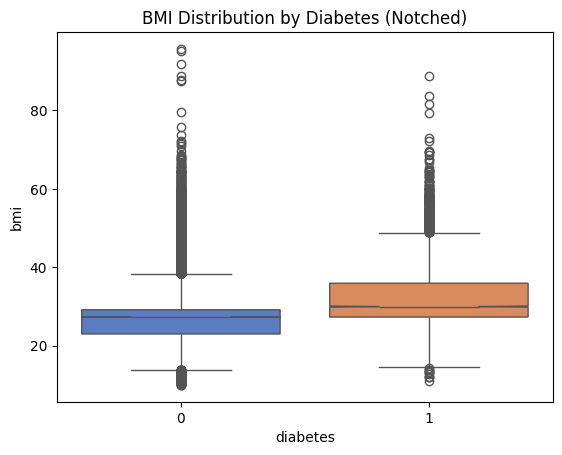

In [34]:
sns.boxplot(x='diabetes', y='bmi', data=df, notch=True, palette='muted')
plt.title('BMI Distribution by Diabetes (Notched)')
plt.show()

# Explanation:
# 1. `notch=True` adds a notch to the box, making it easier to compare the medians visually.
# 2. The notch represents the confidence interval for the median.


Boxplot Age vs Diabetes classification

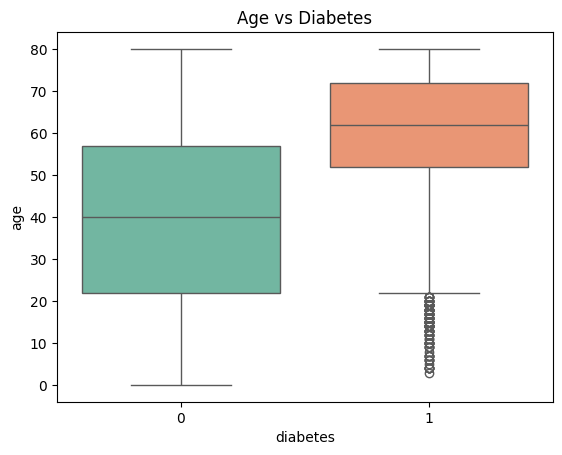

In [36]:
sns.boxplot(x='diabetes', y='age', data=df, palette='Set2')
plt.title('Age vs Diabetes')
plt.show()

# Explanation:
# 1. `palette='Set2'` applies a color palette to the boxes.
# 2. Different color palettes can be applied for better differentiation between the categories.


 Count plot of gender vs diabetes

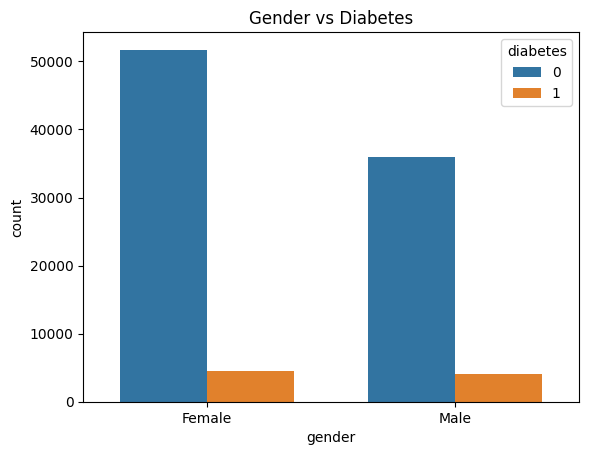

In [38]:
sns.countplot(x='gender', hue='diabetes', data=df, width=0.7)
plt.title('Gender vs Diabetes')
plt.show()

# Explanation:
# 1. `width=0.7` reduces the width of the bars, making them less crowded and more readable.
# 2. This is useful when there are many categories and overlapping bars.


Boxplot HbA1c level vs Diabetes classification

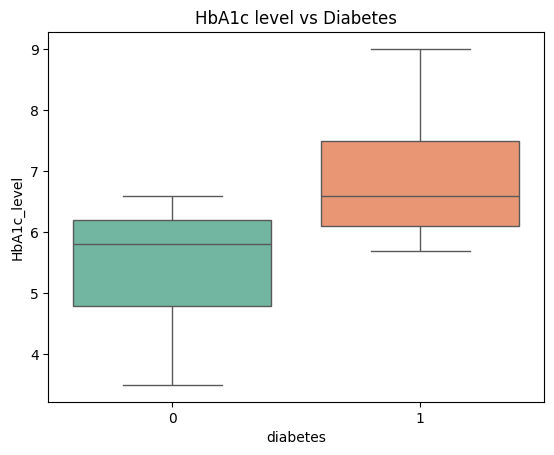

In [39]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, palette='Set2')
plt.title('HbA1c level vs Diabetes')
plt.show()

# Explanation:
# 1. `palette='Set2'` applies a color palette to differentiate between the two groups (with and without diabetes).
# 2. You can choose other palettes like 'Pastel1', 'Blues', etc., for different visual effects.


Boxplot blood glucose level vs Diabetes classification

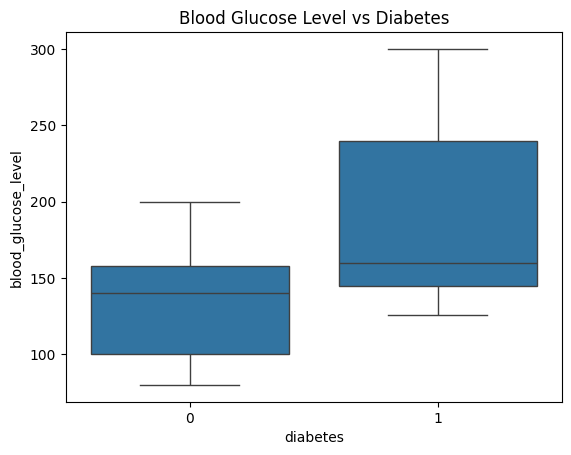

In [40]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

#Multivariate analysis

Scatterplot Age vs BMI colored by Diabetes classification

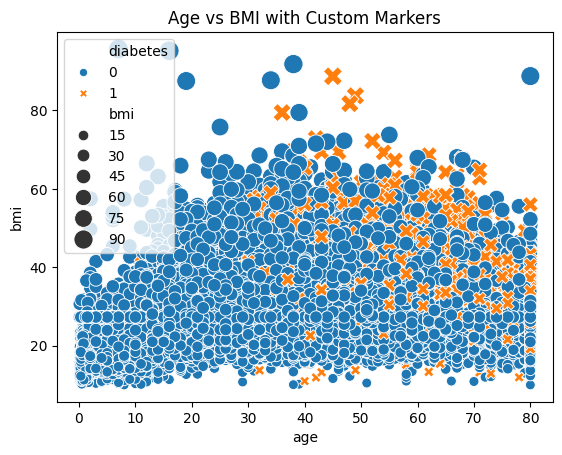

In [48]:
# Customizing the scatter plot by changing the marker size and style for better distinction
sns.scatterplot(x='age', y='bmi', hue='diabetes', style='diabetes', size='bmi', data=df, sizes=(50, 200))
plt.title('Age vs BMI with Custom Markers')
plt.show()

# Explanation:
# 1. `style='diabetes'`: Changes the marker style (e.g., circles for one group, squares for the other).
# 2. `size='bmi'`: Adjusts the size of the markers based on BMI, making it easier to visualize variation in BMI.
# 3. `sizes=(50, 200)`: Controls the range of marker sizes.


Box plot of BMI Distribution by Diabetes Status and Gender

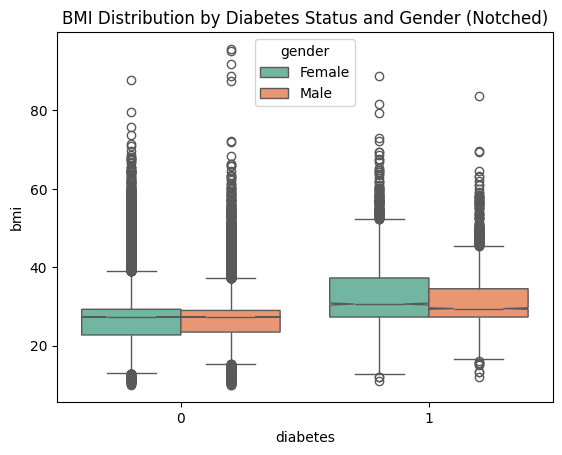

In [49]:
# Adding notches to the box plot to represent the confidence interval around the median
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df, notch=True, palette='Set2')
plt.title('BMI Distribution by Diabetes Status and Gender (Notched)')
plt.show()

# Explanation:
# 1. `notch=True`: Adds notches to the boxes to represent the confidence intervals around the medians.
# 2. `palette='Set2'`: Uses a color palette to differentiate between genders.


 Interaction between gender, Age and diabetes

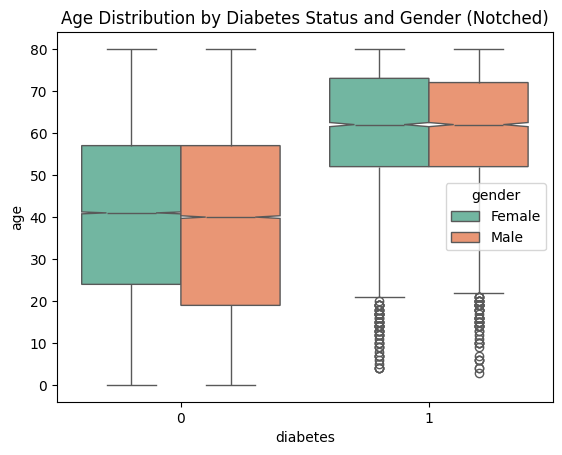

In [50]:
# Adding notches to the box plot to represent the confidence intervals around the median
sns.boxplot(x='diabetes', y='age', hue='gender', data=df, notch=True, palette='Set2')
plt.title('Age Distribution by Diabetes Status and Gender (Notched)')
plt.show()

# Explanation:
# 1. `notch=True`: Adds notches to the boxes, indicating the confidence intervals around the median.
# 2. `palette='Set2'`: Changes the color palette for better differentiation between genders.


#CORRELATION

Data preparation

In [60]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
current    9197
Name: count, dtype: int64


In [61]:
data = df.copy()

In [64]:
import pandas as pd

Encoding

In [65]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

Correlation Matrix

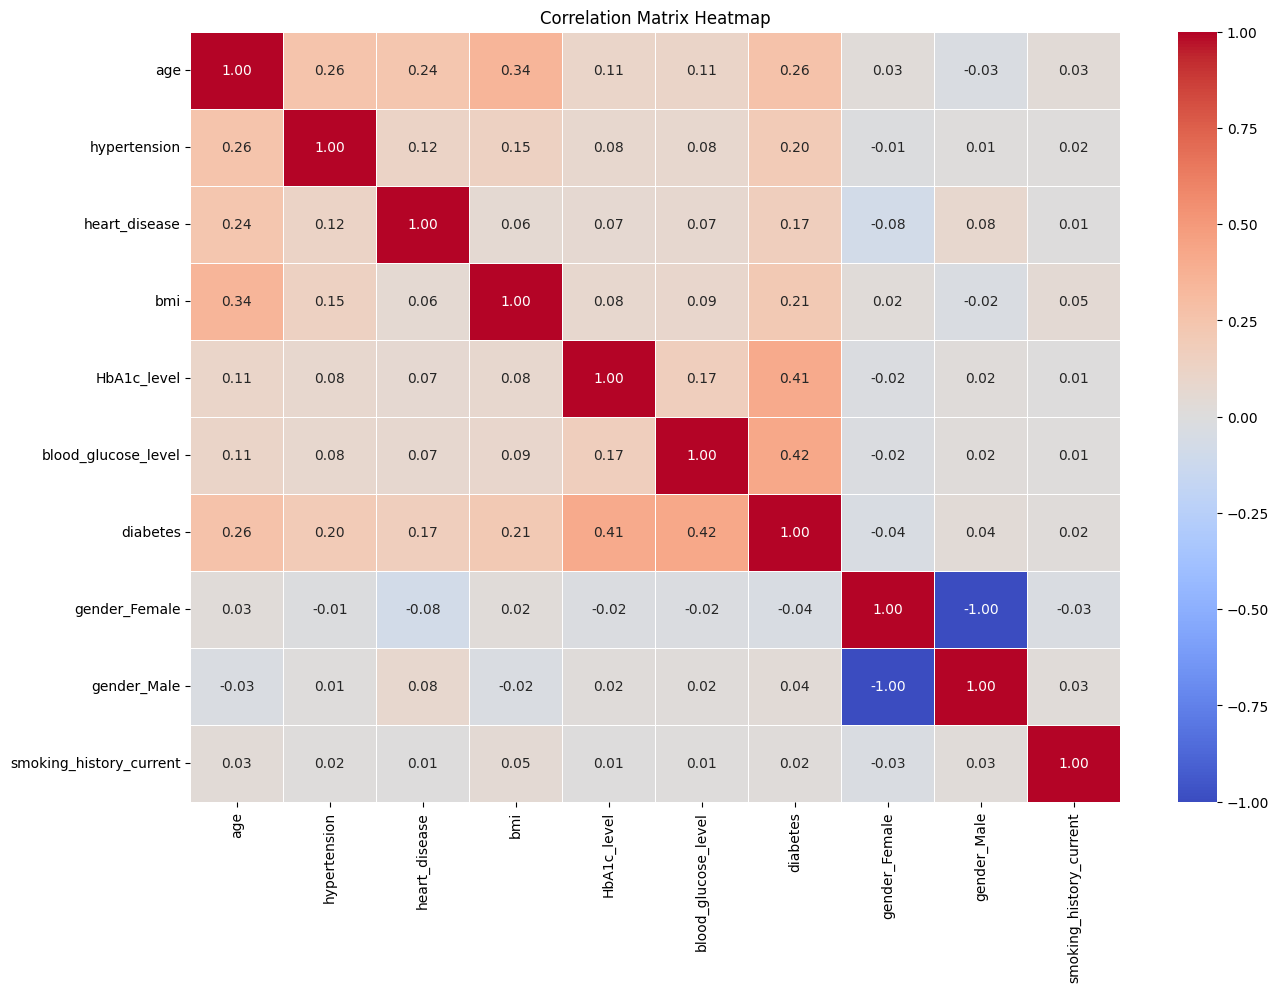

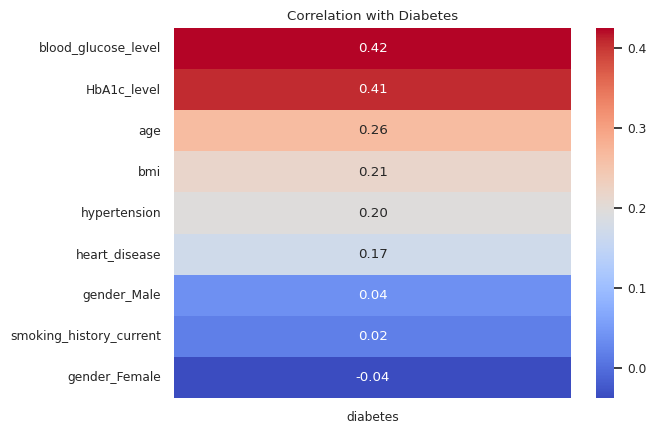

In [66]:
# Compute the correlation matrix for all numerical features in the dataframe
# The correlation matrix is used to understand the relationship between the features (e.g., how correlated one variable is with another)
correlation_matrix = data.corr()

# Graph I: Plot the entire correlation matrix
# Create a heatmap of the full correlation matrix to visualize correlations between all features
plt.figure(figsize=(15, 10))  # Set the size of the figure for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
# 'annot=True' displays the correlation values inside the heatmap cells
# 'cmap' defines the color palette for the heatmap
# 'linewidths' adds separation lines between the heatmap cells
# 'fmt='.2f'' formats the correlation values to 2 decimal places
plt.title("Correlation Matrix Heatmap")  # Add title to the graph
plt.show()  # Display the heatmap

# Graph II: Create a heatmap of the correlation between features and the target variable 'diabetes'
# Extract the correlation values of all columns with respect to the target column ('diabetes')
corr = data.corr()  # Compute the correlation matrix again (only needed if you don't have it already)
target_corr = corr['diabetes'].drop('diabetes')  # Get correlations with 'diabetes' and remove 'diabetes' itself

# Sort the correlation values in descending order to highlight the most positively and negatively correlated features
target_corr_sorted = target_corr.sort_values(ascending=False)

# Customize the heatmap appearance using seaborn settings
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.set_style("white")  # Set the background style to white
sns.set_palette("PuBuGn_d")  # Set the color palette for the heatmap

# Create the heatmap of correlations with 'diabetes'
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
# 'target_corr_sorted.to_frame()' converts the correlation series into a DataFrame for better heatmap display
plt.title('Correlation with Diabetes')  # Add a title for the graph
plt.show()  # Display the heatmap


# PREDICTIVE ANALYSIS

1. Class Imbalance:
From the EDA ,the dataset is imbalanced (with 9% positive cases for diabetes and 91% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

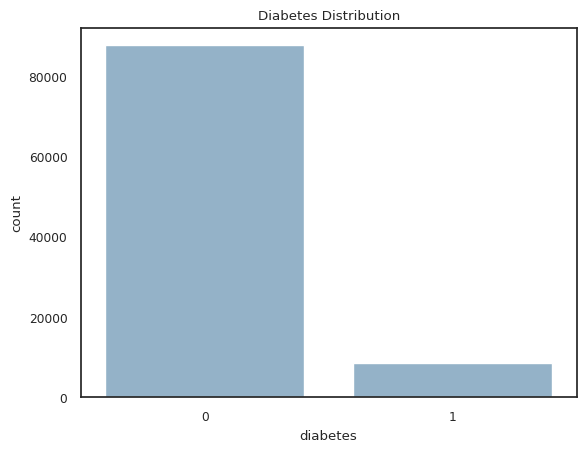

In [67]:
# Count plot for the 'diabetes' variable
# This will display the distribution of values in the 'diabetes' column, showing how many people have diabetes vs. those who don't
sns.countplot(x='diabetes', data=df)
# The 'x' argument specifies the column ('diabetes') to be plotted on the x-axis
# The 'data' argument specifies the DataFrame to be used for the plot

# Set the title of the plot to describe what it represents
plt.title('Diabetes Distribution')

# Display the plot
plt.show()


In [68]:
# Define resampling methods for handling class imbalance

# SMOTE (Synthetic Minority Over-sampling Technique) for oversampling the minority class
# It generates synthetic examples to balance the class distribution by increasing the minority class size
over = SMOTE(sampling_strategy=0.1)
# 'sampling_strategy=0.1' specifies that the minority class will be increased to 10% of the majority class

# RandomUnderSampler for undersampling the majority class
# It randomly reduces the number of samples in the majority class to balance the classes
under = RandomUnderSampler(sampling_strategy=0.5)
# 'sampling_strategy=0.5' specifies that the majority class will be reduced to 50% of the minority class size


2. Preprocessing (Scaler):
Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. Standardization is not required for all models but is generally a good practice. One-hot encoding is necessary for categorical variables to be correctly understood by the machine learning model.

The StandardScaler in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.</p>

In other words, given a feature vector x, it modifies the values as follows:

Yi=xi−μ(→x)σ(→x)

where:

    xi

is the i-th element of the original feature vector →x
,
μ(→x)
is the mean of the feature vector, and
σ(→x)

    is the standard deviation of the feature vector.

The transformed data Y
(each Yi) will have properties such that mean(Y)=0 and std(Y)=1

.

    This transformation is also known as Z-score normalization.


In [69]:
# Define preprocessor to scale numerical features and one-hot encode categorical features
# The preprocessor applies different transformations to different feature types (numerical and categorical)

preprocessor = ColumnTransformer(
    transformers=[
        # Transform numerical columns using StandardScaler (scaling to zero mean and unit variance)
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']),
        # Transform categorical columns using OneHotEncoder (converts categories into binary columns)
        ('cat', OneHotEncoder(), ['gender', 'smoking_history'])
    ])

# Split data into features (X) and target variable (y)

# 'X' contains all the columns except the target variable 'diabetes'
X = df.drop('diabetes', axis=1)

# 'y' is the target variable (the 'diabetes' column)
y = df['diabetes']


In [70]:
# Create a pipeline that preprocesses the data, applies resampling techniques, and then trains a classifier

# The pipeline sequentially applies steps to the data: preprocessing, resampling, and classification
clf = imbPipeline(steps=[
    # Step 1: Apply preprocessor (scaling numerical features and one-hot encoding categorical features)
    ('preprocessor', preprocessor),

    # Step 2: Apply oversampling using SMOTE to handle class imbalance by increasing the minority class
    ('over', over),

    # Step 3: Apply undersampling using RandomUnderSampler to handle class imbalance by reducing the majority class
    ('under', under),

    # Step 4: Apply a classifier (RandomForestClassifier) to train a model on the preprocessed and balanced data
    ('classifier', RandomForestClassifier())
])


3. Model Building and Hyperparameter Tuning:A pipeline is constructed which first applies the preprocessing steps and then trains a model on the data. We use a RandomForestClassifier, which is a popular and powerful algorithm for classification tasks. The model's hyperparameters are tuned using GridSearchCV , which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on cross-validation.

In [71]:
# Define the hyperparameters and the values we want to test for the RandomForestClassifier

# The 'param_grid' dictionary specifies the hyperparameters for the classifier and the range of values to test.
param_grid = {
    # 'classifier__n_estimators': Number of trees in the RandomForestClassifier. We will test 50, 100, and 200 trees.
    'classifier__n_estimators': [50, 100, 200],

    # 'classifier__max_depth': Maximum depth of the trees. We will test no limit (None), a depth of 10, and a depth of 20.
    'classifier__max_depth': [None, 10, 20],

    # 'classifier__min_samples_split': Minimum number of samples required to split an internal node. We will test 2, 5, and 10.
    'classifier__min_samples_split': [2, 5, 10],

    # 'classifier__min_samples_leaf': Minimum number of samples required to be at a leaf node. We will test 1, 2, and 4.
    'classifier__min_samples_leaf': [1, 2, 4]
}


In [73]:
# Create Grid Search object for hyperparameter tuning
# GridSearchCV will search through the parameter grid to find the best combination of hyperparameters using cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
# 'train_test_split' divides the data into training (80%) and testing (20%) sets
# X_train and y_train are used for training the model, while X_test and y_test are used for testing its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data and perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
# 'grid_search.best_params_' gives the combination of hyperparameters that yielded the best performance during the search
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


#Intepret the results

The result shows the best parameters for our Random Forest model that were found during the hyperparameter tuning process:

   

1.   max_depth of 10: This indicates that the maximum depth of the trees in the forest is 10 levels. Constraining the depth of the tree helps in reducing overfitting. It appears from this result that a medium-complexity tree works best for our data. Too much complexity (a deeper tree) may capture noise, and too little (a shallower tree) may not capture the underlying structure of the data.
2.   min_samples_leaf of 2: This means that each leaf (the end node of a decision tree, where predictions are made) must contain at least two samples. This parameter, like max_depth, is a way to control overfitting. By requiring at least two samples to make a prediction, the model prevents fitting to outliers or noise in the training data.

3.   min_samples_split of 2: This tells us that a node must contain at least two samples in order to be split (to create two child nodes). Similar to the min_samples_leaf parameter, this can help control overfitting.
4.   n_estimators of 50: This is the number of decision trees in the forest. The Random Forest algorithm works by averaging the predictions of many decision trees to make a final prediction, which helps reduce overfitting and variance. In this case, it seems that having 50 trees in the forest gives us the best performance.








#Note

These parameters are a result of the Hyperparameter tuning process , and they give us insight into the structure of the data and the complexity of the model that best captures that structure. The moderately constrained tree depth and the requirements for the number of samples at each node suggest a model that is complex enough to capture the important patterns in the data, but not so complex that it overfits to noise or outliers.This balance is crucial in creating a model that will generalize well to new data.

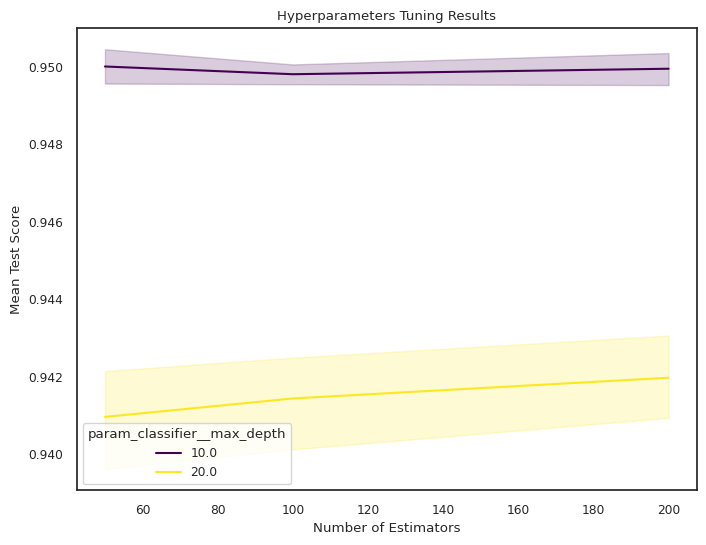

In [74]:
# Convert GridSearchCV results to a DataFrame
# 'cv_results_' contains the cross-validation results of the grid search.
# Convert it into a DataFrame for easier analysis and visualization of the hyperparameter tuning results.
results_df = pd.DataFrame(grid_search.cv_results_)

# Set up the plot size for better visualization
plt.figure(figsize=(8, 6))

# Plot the relationship between the number of estimators, the mean test score, and max depth
# 'sns.lineplot' is used to create a line plot where the x-axis represents the number of estimators,
# the y-axis represents the mean test score, and the line color represents different values of max depth.
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')

# Add title and labels to the plot for clarity
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')  # Number of trees in the Random Forest
plt.ylabel('Mean Test Score')  # Mean cross-validation score for each combination

# Display the plot
plt.show()


Confusion Matrix: The trained model is evaluated on the test set. Confusion matrix is used to visualize the performance of the model. It shows the true positive, true negative, false positive, and false negative predictions of the model.

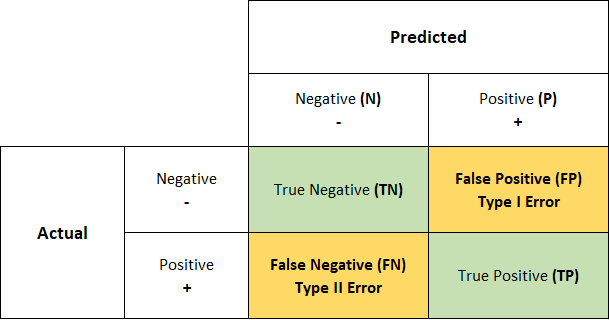

Precision:

Precision is a measure of how many of the true positive predictions were actually correct. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false positives (FP).

Precision=TPTP+FP

Recall:

Recall (or Sensitivity) is a measure of how many of the actual positive cases were identified correctly. It is defined as the number of true positives (TP) divided by the sum of true positives (TP) and false negatives (FN).


Recall=TPTP+FN

F1-Score:

The F1 score is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.


F1Score=2∗Precision∗RecallPrecision+Recall

Model Accuracy:  0.9486112555913867
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



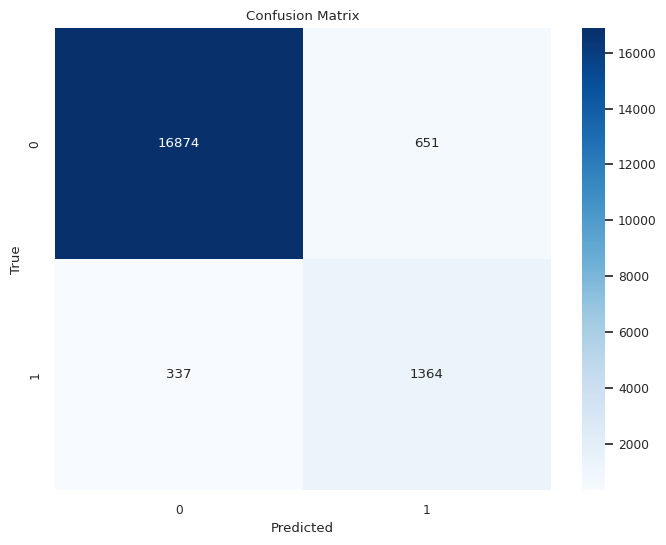

In [75]:
# Predict on the test set using the best model found by GridSearchCV
# Use the best model from grid search to make predictions on the test set (X_test)
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance using accuracy and other classification metrics
# Accuracy is the proportion of correct predictions out of all predictions
print("Model Accuracy: ", accuracy_score(y_test, y_pred))

# Print detailed classification metrics including precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))

# Plot confusion matrix to visualize the model's performance in terms of true vs predicted labels
# Confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives
cm = confusion_matrix(y_test, y_pred)

# Set up the plot size for better readability
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the confusion matrix
# The 'annot=True' adds the actual numbers in each cell, 'fmt="d"' formats it as an integer, and 'cmap="Blues"' sets the color map
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add titles and labels for clarity
plt.title('Confusion Matrix')  # Title of the plot
plt.xlabel('Predicted')  # Label for the x-axis (Predicted labels)
plt.ylabel('True')  # Label for the y-axis (True labels)

# Display the confusion matrix plot
plt.show()


#Intepret the results

The accuracy of our trained Random Forest model is approximately 95%, meaning that it correctly predicted the outcome for about 95% of the cases in the test set.

To gain a more detailed understanding of the model’s performance, let’s break down the classification metrics for each class (0 and 1) individually:

A | Class 0 (Non-diabetes):

*   For class 0 (Non-diabetes), the model demonstrates a high precision of 0.98. This means that when the model predicted non-diabetes, 98% of those predictions were correct.
*   Additionally, the recall for class 0 is strong at 0.96. This indicates that the model successfully identified 96% of all actual non-diabetes cases in the dataset.

B | Class 1 (Diabetes):

*   For class 1 (Diabetes), the precision is lower at approximately 0.65, meaning that when the model predicted diabetes, it was correct about 65% of the time.
*   However, the recall for class 1 is relatively high at around 0.80, indicating that the model successfully identified 80% of all actual diabetes cases.

The F1 score, which combines precision and recall, is approximately 0.97 for class 0 (Non-diabetes) and around 0.72 for class 1 (Diabetes). The weighted average F1 score is about 0.94, which aligns closely with the model’s overall accuracy.

This difference in performance between the two classes can be attributed to the class imbalance in the original dataset. Since class 0 (Non-diabetes) is the majority class, it has more examples for the model to learn from.

However, the relatively higher recall for class 1 (Diabetes) is encouraging. In healthcare applications, this is particularly important, as failing to identify true positive cases (false negatives) could lead to serious consequences.





                   Feature  Importance
2              HbA1c_level        0.45
3      blood_glucose_level        0.31
0                      age        0.13
1                      BMI        0.07
4             hypertension        0.02
5            heart_disease        0.01
6            gender_Female        0.00
7              gender_Male        0.00
8  smoking_history_current        0.00
9     smoking_history_None        0.00


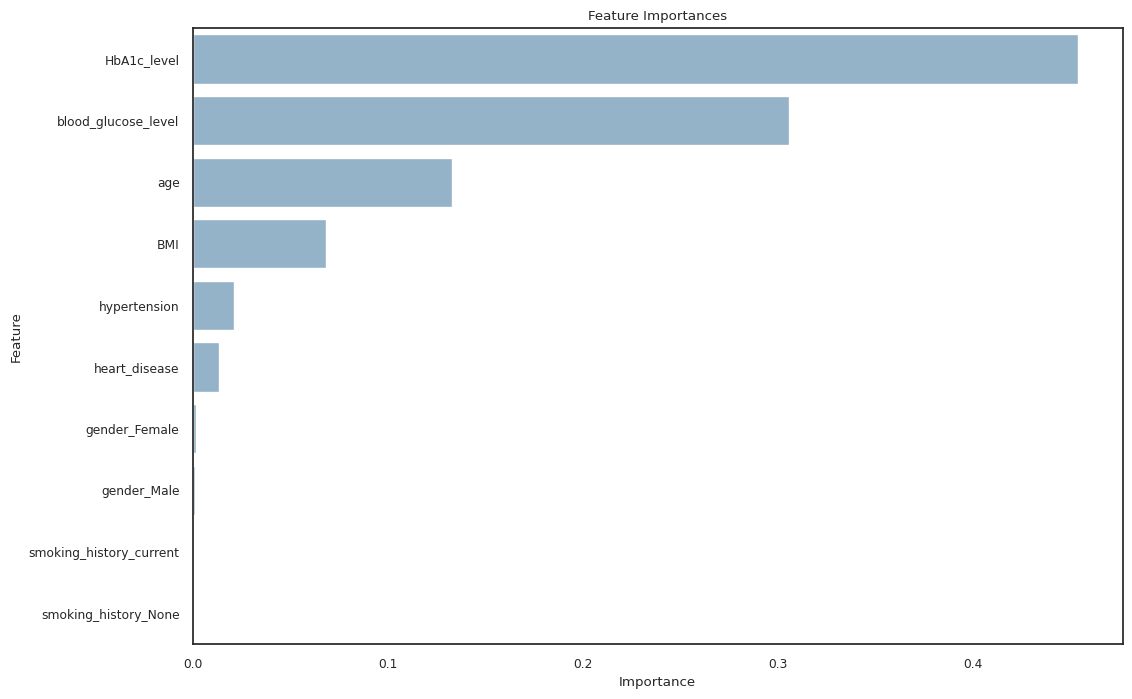

In [76]:
# After fitting the model, we input feature names
# Get the feature names for the one-hot encoded categorical columns ('gender' and 'smoking_history')
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
# Define the list of numeric features used in the model
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
# Access the feature importances from the trained Random Forest model
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
# Create a DataFrame that pairs each feature name with its corresponding importance value
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
# This allows us to see which features have the most impact on the model
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
# Display the DataFrame with sorted feature importances
print(importance_df)

# Plot the feature importances
# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')  # Set the title of the plot
plt.show()  # Display the plot


#Intepret the results

The feature importance analysis reveals which features play a crucial role in predicting diabetes with our Random Forest model. Feature importance is determined by assessing how much the nodes using that feature contribute to reducing impurity across all trees in the forest.

**Here are the key findings from the feature importance results:**


1.   **HbA1c_level** emerges as the most important feature with an importance score of 0.45. HbA1c reflects the average blood glucose levels over the past 2-3 months, making it a strong indicator for predicting diabetes.
2.   **Blood_glucose_level** ranks second with an importance of 0.31. This is consistent with medical understanding, as blood glucose levels are a primary diagnostic tool for diabetes.
3.   **Age** comes third with an importance score of 0.13. It is widely known that the likelihood of developing type 2 diabetes increases with age.
4.   **BMI** is the fourth most important feature, with an importance score of 0.07. As a key risk factor for diabetes, BMI’s role is well supported by medical research.
5.   Features such as **hypertension** and **heart_disease** also show some importance (0.02 and 0.01, respectively), suggesting that these health conditions may have some predictive value for diabetes, though they are less influential than the top four factors.
6.    **Smoking history** (with categories 'smoking_history_non-smoker', 'smoking_history_past_smoker', 'smoking_history_current') and gender (with categories 'gender_Female', 'gender_Male') show minimal or no importance. This may reflect the lesser impact of these variables on diabetes development or how the data was structured and collected.







#SUMMARY

**A Random Forest classifier** was used to predict diabetes based on health indicators and lifestyle factors, trained on a dataset of 100,000 records with hyperparameter tuning.

The model achieved 95.1% accuracy, with precision of 0.98 for non-diabetic cases and 0.69 for diabetic cases. It recalled 96% of non-diabetic and 81% of diabetic cases, demonstrating strong performance across both classes.

Feature importance analysis highlighted HbA1c_level and blood_glucose_level as the key predictors, with Age and BMI also being important. However, features like smoking history and gender had minimal impact on the predictions.